In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("BlackFriday.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [4]:
df["Age"].nunique()

7

In [5]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

# How many Products They have Purchased. 

<AxesSubplot:title={'center':'Purchase Distribution By Age'}, xlabel='Age'>

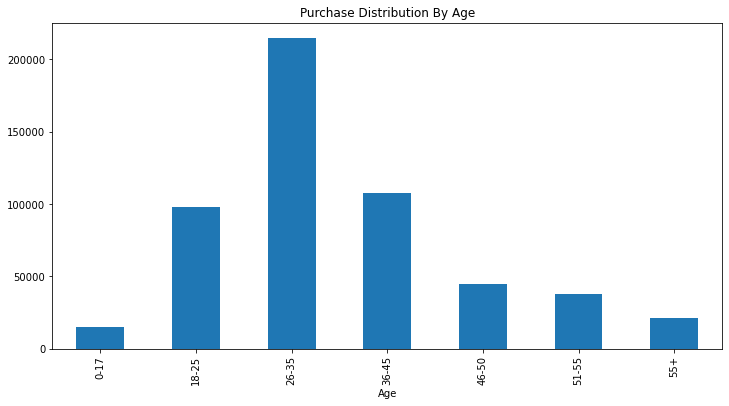

In [6]:
df.groupby("Age").size().plot(kind='bar',figsize=(12,6),
                        title='Purchase Distribution By Age')

In [7]:
a={}
for i in df["Age"].unique():
    c=0
    for name in df['Age']:
        if(i==name):
            c+=1
            a[name]=c

    

In [8]:
a

{'0-17': 14707,
 '55+': 20903,
 '26-35': 214690,
 '46-50': 44526,
 '51-55': 37618,
 '36-45': 107499,
 '18-25': 97634}

# No of Unique Products at Particular Age.

In [9]:
lst=[]
for i in df['Age'].unique():
    lst.append([i,df[df["Age"]==i]['Product_ID'].nunique()])

data=pd.DataFrame(lst,columns=["Age",'Products'])
data

,Age,Products
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877
5,36-45,3318
6,18-25,3213


<AxesSubplot:xlabel='Age'>

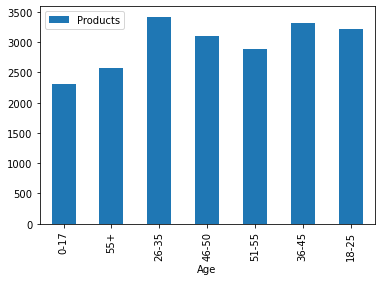

In [10]:
data.plot.bar(x='Age')

In [11]:
name

'36-45'

# How Much Amount they have Spent?

<AxesSubplot:title={'center':'Amount Spent by age'}, xlabel='Age'>

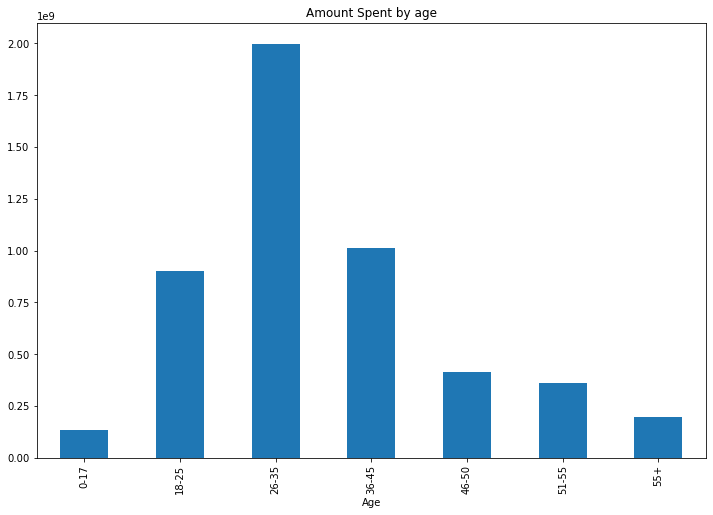

In [19]:
df.groupby('Age').sum()["Purchase"].plot(kind='bar',figsize=(12,8),
                             title='Amount Spent by age')

# How much average price the each group is paying?

<AxesSubplot:title={'center':'Amounnt Spent by age'}, xlabel='Age'>

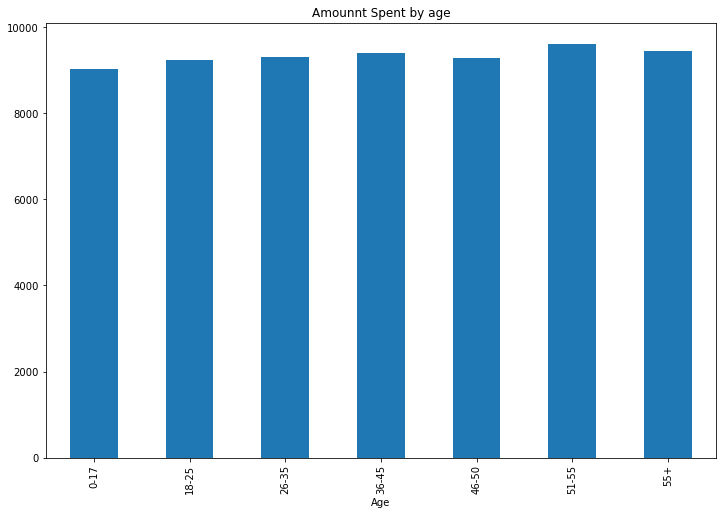

In [13]:
df.groupby('Age').mean()["Purchase"].plot(kind='bar',figsize=(12,8),
                             title='Amounnt Spent by age')

<AxesSubplot:title={'center':'Amounnt Spent by age'}, ylabel='Purchase'>

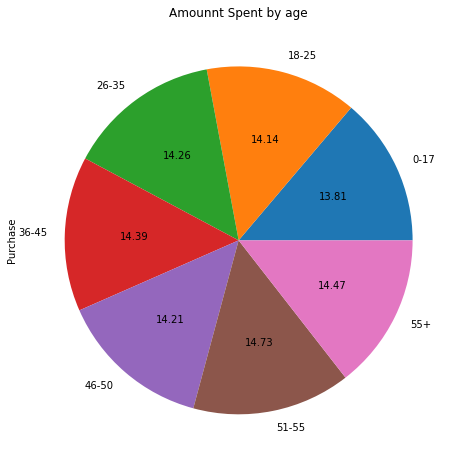

In [14]:
df.groupby('Age').mean()["Purchase"].plot(kind='pie',figsize=(12,8),
                             title='Amounnt Spent by age',
                                          autopct='%0.2f')

<AxesSubplot:ylabel='None'>

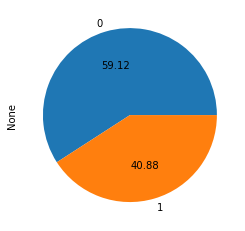

In [15]:
df.groupby("Marital_Status").size().plot(kind='pie',autopct='%0.2f')

In [16]:
df['Marital_Status'].describe()

count    537577.000000
mean          0.408797
std           0.491612
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Marital_Status, dtype: float64

# This tells the number of category existing in each column

In [17]:
for column in df.columns:
    print(column,":",df[column].nunique())

User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Product_Category_2 : 17
Product_Category_3 : 15
Purchase : 17959


In [18]:
df.groupby("Age").mean()["Purchase"]

Age
0-17     9020.126878
18-25    9235.197575
26-35    9314.588970
36-45    9401.478758
46-50    9284.872277
51-55    9620.616620
55+      9453.898579
Name: Purchase, dtype: float64